In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy, math
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv", low_memory=False)

In [3]:
test = pd.read_csv("test.csv", low_memory=False)

In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
for column in train.columns:
    if column in {"Pclass", "SibSp", "Parch", "Embarked"}:
        print(column, "==>", train[column].unique())

Pclass ==> [3 1 2]
SibSp ==> [1 0 3 4 2 5 8]
Parch ==> [0 1 2 5 3 4 6]
Embarked ==> ['S' 'C' 'Q' nan]


#### Missing values

In [6]:
missing = train.isnull().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Take a look at some dependecies

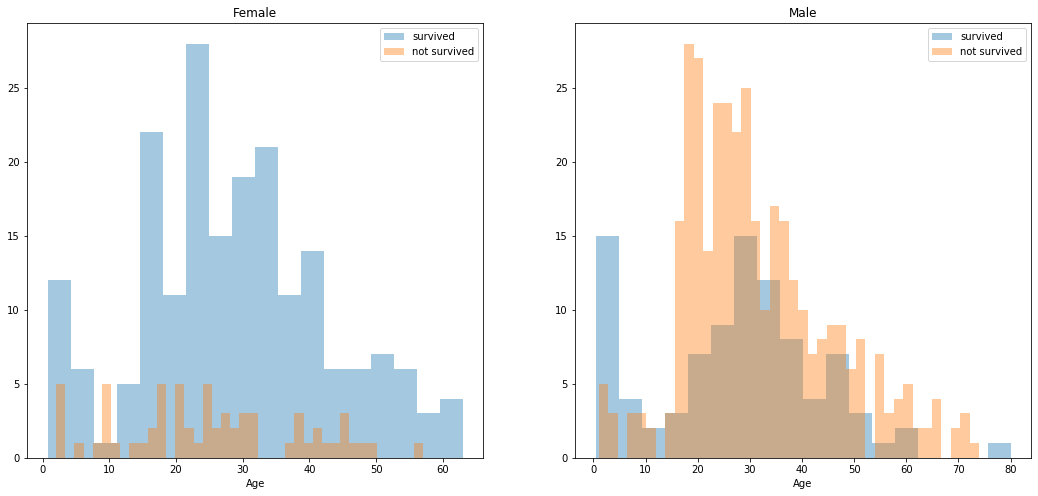

In [7]:
# Age and Sex
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
# women
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = "survived", ax = axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = "not survived", ax = axes[0], kde=False)
ax.legend()
ax.set_title('Female')
# men
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = "survived", ax = axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = "not survived", ax = axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


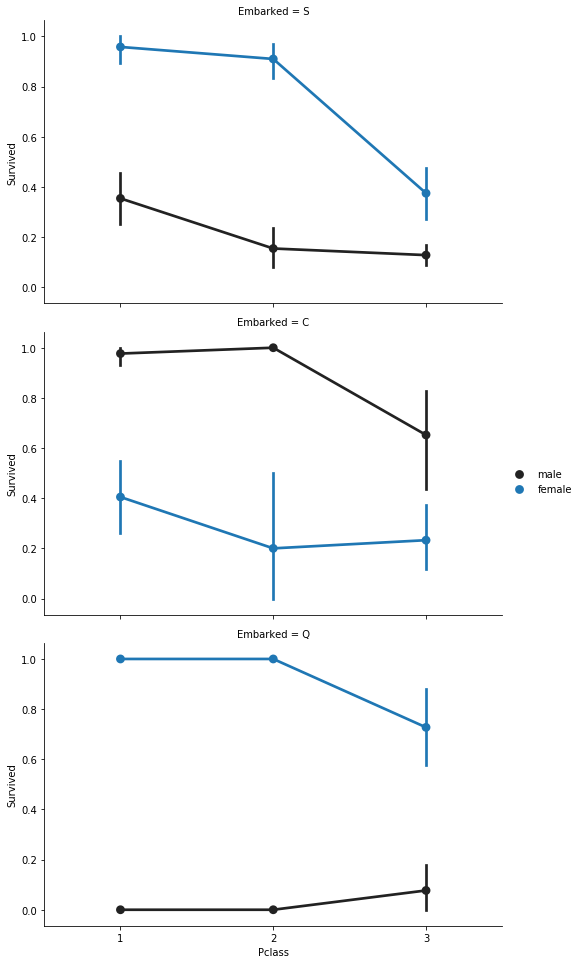

In [26]:
# Embarked, Pclass and Sex
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()

#### Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

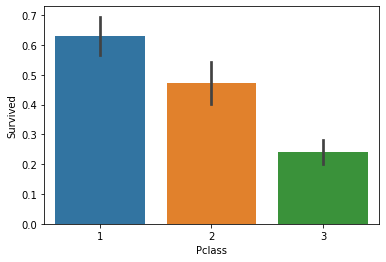

In [11]:
# Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

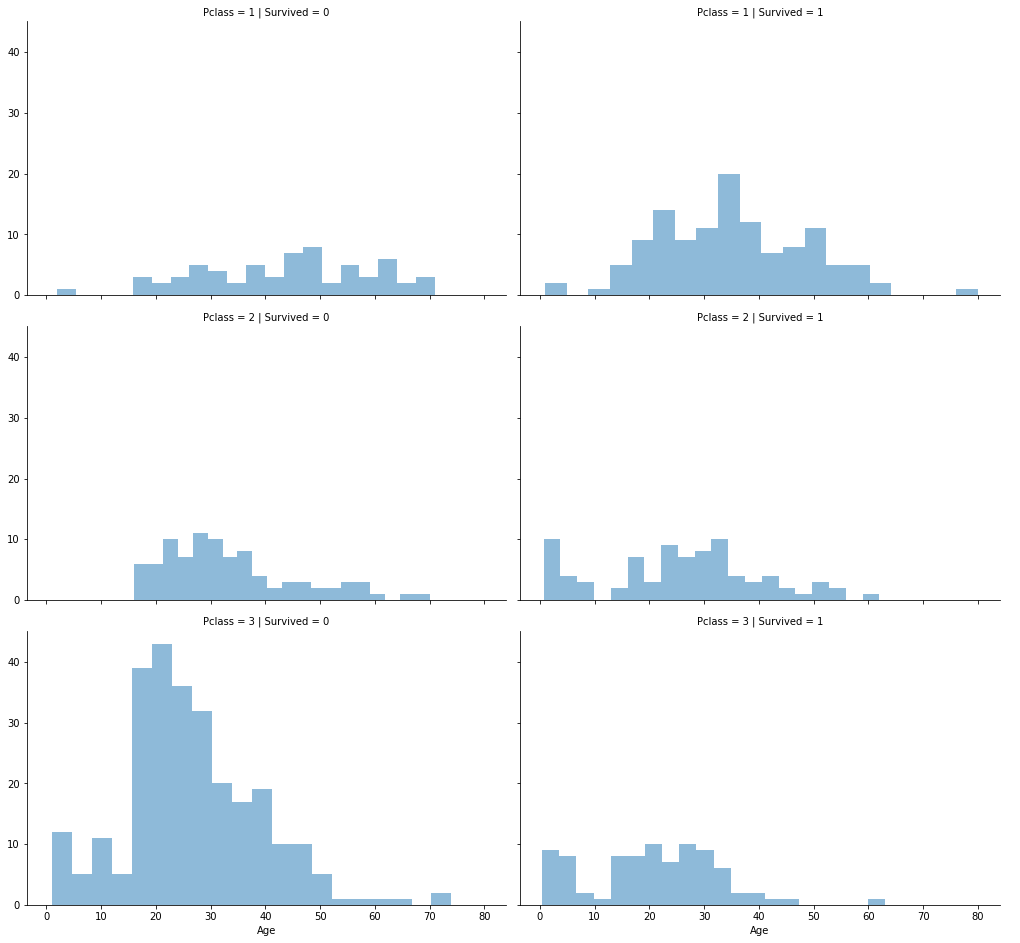

In [12]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Pclass 1 with high chance of surviving and new thing is that Pclass 3 has a high chance of dying

In [7]:
# SibSp and Parch
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'is_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'is_alone'] = 1
    dataset['is_alone'] = dataset['is_alone'].astype(int)
train['is_alone'].value_counts()

1    537
0    354
Name: is_alone, dtype: int64

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


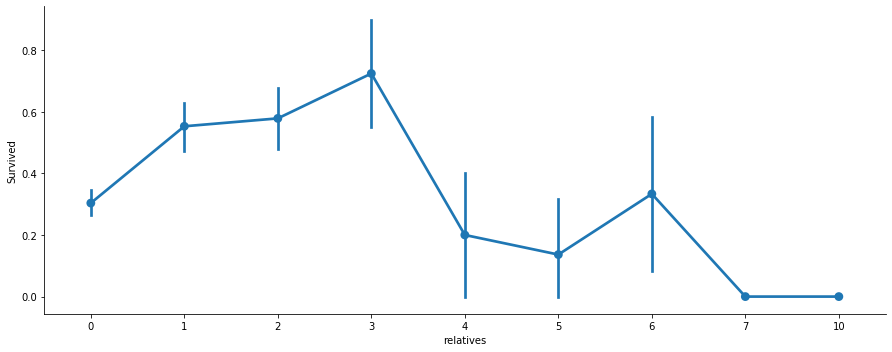

In [14]:
axes = sns.factorplot('relatives', 'Survived', data=train, aspect=2.5)

### Data Preprocessing

In [8]:
train = train.drop("PassengerId", axis = 1)

### Missing values

#### Cabin (687), Embarked(2) and Age(177)
#### Using Cabin I can extract deck cause every cabin name has this letter and number

In [10]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

#### Now let's fill missing values for Age column with random numbers in range of mean and std deviation

In [11]:
for dataset in data:
    mean = dataset['Age'].mean()
    std = dataset['Age'].std()
    is_null = dataset['Age'].isnull().sum() # number of missing values in dataset
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age # filling nan's with generated random numbers 
    dataset['Age'] = age_slice
    dataset['Age'] = dataset['Age'].astype(int)
# just checking
train['Age'].isnull().sum()

0

#### Embarked has only 2 missing values, so let's fill it with the most common ones

In [13]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
common_value = 'S'
for dataset in data:
    dataset['Embarked'].fillna(common_value, inplace=True)

### Converting features

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
is_alone     891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [14]:
# Converting Fare column to int-type
for dataset in data:
    dataset['Fare'].fillna(0, inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
# Name:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common titles or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                                'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into names
    dataset['Title'] = dataset['Title'].map(titles)
    # filling nans with 0
    dataset['Title'].fillna(0, inplace=True)
    
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [16]:
# Sex
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [17]:
# Ticket
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

#### There are 681 unique tickets, therefore it's senseless to create such a great number of additional features
#### Let's just drop Ticket feature

In [18]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [19]:
# Embarked:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
# Embarked: convert it into numeric
ports = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories

In [21]:
# Age - > AgeGroup
for dataset in data:
    dataset.loc[dataset['Age'] <= 11, 'AgeGroup'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'AgeGroup'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'AgeGroup'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'AgeGroup'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'AgeGroup'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'AgeGroup'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'AgeGroup'] = 6
    dataset.loc[ dataset['Age'] > 66, 'AgeGroup'] = 6

In [22]:
train['AgeGroup'] = train['AgeGroup'].astype(int)
test['AgeGroup'] = test['AgeGroup'].astype(int)

In [23]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,is_alone,Deck,Title,AgeGroup
0,0,3,0,22,1,0,7,0,1,0,8,1,2
1,1,1,1,38,1,0,71,1,1,0,3,3,5
2,1,3,1,26,0,0,7,0,0,1,8,2,3
3,1,1,1,35,1,0,53,0,1,0,3,3,5
4,0,3,0,35,0,0,8,0,0,1,8,1,5
5,0,3,0,33,0,0,8,2,0,1,8,1,4
6,0,1,0,54,0,0,51,0,0,1,5,1,6
7,0,3,0,2,3,1,21,0,4,0,8,4,0
8,1,3,1,27,0,2,11,0,2,0,8,3,3
9,1,2,1,14,1,0,30,1,1,0,8,3,1


In [24]:
# Fare
pd.qcut(train['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [25]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'FareGroup'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'FareGroup'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'FareGroup']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'FareGroup']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'FareGroup']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'FareGroup'] = 5
    dataset['FareGroup'] = dataset['FareGroup'].astype(int)

### Creating new Features

In [26]:
# AgeGroup times Class
for dataset in data:
    dataset['Age_Class'] = dataset['AgeGroup'] * dataset['Pclass']

In [27]:
# Fare per Person
for dataset in data:
    dataset['Fare_per_person'] = dataset['FareGroup']/(dataset['relatives'] + 1)
    dataset['Fare_per_person'] = dataset['Fare_per_person'].astype(int)

In [28]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,is_alone,Deck,Title,AgeGroup,FareGroup,Age_Class,Fare_per_person
0,0,3,0,22,1,0,7,0,1,0,8,1,2,0,6,0
1,1,1,1,38,1,0,71,1,1,0,3,3,5,3,5,1
2,1,3,1,26,0,0,7,0,0,1,8,2,3,0,9,0
3,1,1,1,35,1,0,53,0,1,0,3,3,5,3,5,1
4,0,3,0,35,0,0,8,0,0,1,8,1,5,1,15,1
5,0,3,0,33,0,0,8,2,0,1,8,1,4,1,12,1
6,0,1,0,54,0,0,51,0,0,1,5,1,6,3,6,3
7,0,3,0,2,3,1,21,0,4,0,8,4,0,2,0,0
8,1,3,1,27,0,2,11,0,2,0,8,3,3,1,9,0
9,1,2,1,14,1,0,30,1,1,0,8,3,1,2,2,1


In [29]:
train.shape

(891, 16)

In [30]:
test.shape

(418, 16)

### Building Machine Learning Models

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [32]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

X_test = test.drop("PassengerId", axis=1)

#### Stochastic Gradient Descent (SGD)

In [33]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

70.37

#### Random Forest

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.53

#### Logistic Regression

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.93

#### K-Nearest Neighbor

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.16

#### Gaussian Naive Bayes

In [37]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

#### Perceptron

In [38]:
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


69.25

#### Linear Support Vector Machine

In [39]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


75.98

#### Decision Tree

In [40]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.53

In [41]:
results = pd.DataFrame({'Model': ['Stochastic Gradient Descent', 'Random Forest', 
                                  'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes',
                                  'Perceptron', 'Linear Support Vector Machine', 'Decision Tree'],
                        'Score': [acc_sgd, acc_random_forest, acc_log, acc_knn, acc_gaussian, 
                                  acc_perceptron, acc_linear_svc, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df.head(9)

,Model,Score
1,Random Forest,97.53
7,Decision Tree,97.53
3,K-Nearest Neighbors,83.16
2,Logistic Regression,81.93
4,Gaussian Naive Bayes,78.00
6,Linear Support Vector Machine,75.98
0,Stochastic Gradient Descent,70.37
5,Perceptron,69.25


In [42]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Deviation: ", scores.std())

Scores:  [0.75555556 0.83333333 0.74157303 0.84269663 0.85393258 0.82022472
 0.82022472 0.79775281 0.85393258 0.82954545]
Mean:  0.8148771422086029
Standard Deviation:  0.036909820177858085


### Feature Importance

In [43]:
importances = pd.DataFrame({'feature': X_train.columns,
                           'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age,0.175
Title,0.163
Sex,0.133
Fare,0.116
Age_Class,0.064
Pclass,0.063
Deck,0.053
relatives,0.044
AgeGroup,0.042


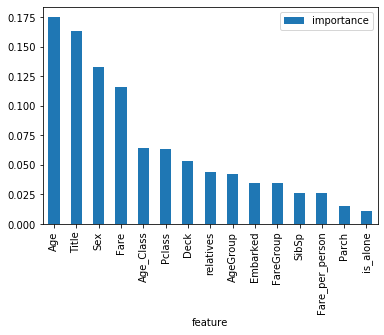

In [44]:
importances.plot.bar()

In [45]:
for dataset in data:
    dataset.drop(['is_alone', 'Parch'], axis=1, inplace=True)

In [49]:
# Let's improve Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_rf= round(random_forest.score(X_train, Y_train) * 100, 2)
acc_rf

97.31

In [55]:
print(f"oob score: {round(random_forest.oob_score_, 3) * 100} %")

oob score: 81.5 %


#### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_leaf": [1, 5, 10, 25],
              "min_samples_split": [2, 4, 10, 12],
              "n_estimators": [10, 40, 70, 100]}
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_features='auto', oob_score=True, random_state=1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 70}

In [60]:
# with new hyperparamets 
rf = RandomForestClassifier(criterion="gini",
                           min_samples_leaf = 1,
                           min_samples_split = 12, 
                           n_estimators = 70,
                           max_features = 'auto',
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)
rf.fit(X_train, Y_train)
Y_prediction = rf.predict(X_test)
print(f"oob_score: {round(rf.oob_score_, 4) * 100}%")

oob_score: 82.72%


#### Confusion Matrix

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
preds = cross_val_predict(rf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, preds)

array([[499,  50],
       [ 95, 247]])

In [62]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print(f"Precision: {precision_score(Y_train, preds)}")
print(f"Recall: {recall_score(Y_train, preds)}")

Precision: 0.8316498316498316
Recall: 0.7222222222222222


In [63]:
# F-score
from sklearn.metrics import f1_score
f1_score(Y_train, preds)

0.7730829420970265